In [1]:
import numpy as np
import scipy
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import csv
from scipy.optimize import linprog
from scipy.linalg import cho_factor, cho_solve
from scipy import sparse
import time

In [242]:
m = 200
n = 400
A = np.random.rand(m, n)
x = np.random.rand(n, 1)
c = np.random.rand(n, 1)
b = np.dot(A, x)

In [243]:
At = np.transpose(A)
AAt = np.dot(A, At)
x = np.dot(np.linalg.inv(AAt), b)
x = np.dot(At, x)
y = np.dot(A, c)
y = np.dot(np.linalg.inv(AAt),(y))
s = c - np.dot(At, y)
deltax = max(-1.5*min(x), 0)
deltas = max(-1.5*min(s), 0)

deltaxx = deltax + 0.5*(np.dot(np.transpose(x + deltax), (s + deltas)))/(np.sum(s + deltas))
deltass = deltas + 0.5*(np.dot(np.transpose(x + deltax), (s + deltas)))/(np.sum(x + deltax))
x = x + deltaxx
s = s + deltass

print(min(x), min(s))

[0.49765629] [0.77922329]


In [12]:
m = 2000
n = 4000
start = time.time()
A = np.random.rand(m, n)
x = np.random.rand(n, 1)
c = np.random.rand(n, 1)
b = np.dot(A, x)
end = time.time()
print("time taken = ", end - start)
for j in [1, 10]:
    start = time.time()
    for i in range(0, j):
        A = np.random.rand(m, n)
        x = np.random.rand(n, 1)
        c = np.random.rand(n, 1)
        b = np.dot(A, x)
        result = linprog(c, A_eq = A, b_eq=b, method='simplex')#'interior-point'
    end = time.time()
    print(j, "time taken = ", end - start)

time taken =  0.07404422760009766
1 time taken =  30.82318615913391


KeyboardInterrupt: 

In [118]:
print(result)

     con: array([-6.81853862e-07, -6.79652885e-07, -6.99414386e-07, ...,
       -6.87579018e-07, -6.78724291e-07, -6.82881478e-07])
     fun: 639.2535807496896
 message: 'Optimization terminated successfully.'
     nit: 16
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([3.16916106e-01, 1.13952382e+00, 7.32587520e-01, ...,
       5.28966014e-10, 1.49316228e+00, 4.74185528e-01])


In [75]:
print(A)
print(b)
print(c)

[[0.82560675 0.45022456 0.41863624 ... 0.1753015  0.49407419 0.8545358 ]
 [0.06326723 0.86550452 0.76963276 ... 0.58990727 0.29589559 0.5915082 ]
 [0.99193755 0.4124888  0.31298569 ... 0.18375197 0.19250287 0.08527408]
 ...
 [0.01052275 0.88830292 0.60699292 ... 0.18911783 0.34999068 0.63886743]
 [0.57280089 0.23455771 0.18254087 ... 0.94546844 0.84505814 0.12164906]
 [0.65851361 0.31677676 0.32709979 ... 0.31042012 0.23114033 0.88212522]]
[[53.9165529 ]
 [50.63227499]
 [50.7009949 ]
 [53.05584592]
 [47.45375636]
 [53.13538435]
 [56.80694505]
 [53.45400258]
 [51.71171936]
 [48.7954862 ]
 [51.87063502]
 [53.58721278]
 [52.09679515]
 [55.25400311]
 [51.45571385]
 [49.08996913]
 [52.05491497]
 [49.37845587]
 [53.8291333 ]
 [53.23796651]
 [51.8673571 ]
 [47.33139748]
 [49.68237005]
 [50.28089011]
 [53.32957909]
 [48.73540546]
 [53.13025368]
 [54.54622725]
 [45.29784213]
 [51.02465408]
 [53.9754128 ]
 [52.50656527]
 [53.11347426]
 [54.53836006]
 [55.34746694]
 [52.99590207]
 [50.0862244 ]
 

In [6]:
print(x)
print(y)
print(s)

[[0.61884417]
 [0.33913621]
 [0.28886873]]
[[-0.06167313]
 [ 0.90231412]]
[[0.30010877]
 [0.81103541]
 [0.88176874]]


In [54]:
8 * 2000 * 2010 * 256 /(1000 * 1000)

8232.96

In [244]:
np.savetxt("B_r_dense.csv", b, delimiter = " ")
np.savetxt("C_r_dense.csv", c, delimiter = " ")
np.savetxt("x_ini_dense.csv", x, delimiter = " ")
np.savetxt("y_ini_dense.csv", y, delimiter = " ")
np.savetxt("s_ini_dense.csv", s, delimiter = " ")

In [245]:
Asave = np.zeros(m * n)
c = 0
for i in range(0, m):
    for j in range(0, n):
        Asave[c] = A[i][j]
        c += 1
        
AT = np.transpose(A)
AsaveT = np.zeros(m * n)
c = 0
for i in range(0, n):
    for j in range(0, m):
        AsaveT[c] = AT[i][j]
        c += 1
np.savetxt("A_r_dense.csv", Asave.T, delimiter = " ")
np.savetxt("A_r_t_dense.csv", AsaveT.T, delimiter = " ")

In [257]:
print(7.38/1.41, 15.63/3.52, 29.89/7.10, 189.37/ 47.26, 1170.5/217, 7452/1334.61 )

5.23404255319149 4.440340909090909 4.209859154929577 4.006982649174778 5.394009216589862 5.583653651628566


In [144]:
4.228*20

84.56

In [3]:
t100 = np.array([0.209, 0.339, 0.401, 0.587, 1.939, 3.52, 17.5, 35.16])
tx = np.array([0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10])
s100 = 15.63*tx/t100
print(15.63*tx/t100)

[0.07478469 0.46106195 1.94887781 2.66269165 4.03042806 4.44034091
 4.46571429 4.44539249]


In [4]:
t50 = np.array([0.223, 0.264, 0.296, 0.365, 0.93, 1.41, 7.27, 14.25])
tx = np.array([0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10])
s50 = 7.38*tx/t50
print(7.38*tx/t50)

[0.03309417 0.27954545 1.24662162 2.02191781 3.96774194 5.23404255
 5.07565337 5.17894737]


In [5]:
t200 = np.array([0.246, 0.437, 1.335, 1.365, 3.39, 7.10, 35.67, 73.5])
s200 = 29.94*tx/t200
print(29.94*tx/t200)

[0.12170732 0.68512586 1.12134831 2.19340659 4.4159292  4.21690141
 4.19680404 4.07346939]


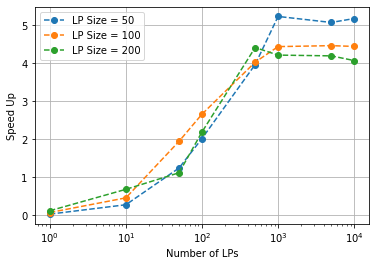

In [6]:
lps = [1, 10, 50, 100, 500, 1000, 5000, 10000]
plt.semilogx(lps, s50, '--o')
plt.semilogx(lps, s100, '--o')
plt.semilogx(lps, s200,'--o')
labels = ['LP Size = 50', 'LP Size = 100', 'LP Size = 200']
plt.legend(labels)
plt.grid()
plt.xlabel('Number of LPs')
plt.ylabel('Speed Up')
plt.savefig('NoLPvsSpeedIPM.png')

In [2]:
s50 = 74.04*tx/t50
s100 = 258.62*tx/t100
s200 = 1304.05 * tx/t200
lps = [1, 10, 50, 100, 500, 1000, 5000, 10000]
plt.semilogx(lps, s50, '--o')
plt.semilogx(lps, s100, '--o')
plt.semilogx(lps, s200,'--o')
labels = ['LP Size = 50', 'LP Size = 100', 'LP Size = 200']
plt.legend(labels)
plt.grid()
plt.xlabel('Number of LPs')
plt.ylabel('Speed Up')
plt.savefig('NoLPvsSpeedSimplex.png')

NameError: name 'tx' is not defined